In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/sarthak/Desktop/learning stuff/python/data-sciense ---jose-portlieo/recomndestion/ml-latest-small/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
movie_title = pd.read_csv('/Users/sarthak/Desktop/learning stuff/python/data-sciense ---jose-portlieo/recomndestion/ml-latest-small/movies.csv')
movie_title = movie_title.iloc[:,:-1]
movie_title.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [26]:
df = pd.merge(df,movie_title,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [27]:
sns.set_style('white')
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [28]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [29]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of rating
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

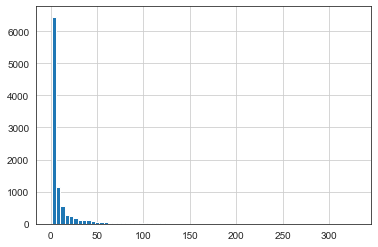

In [30]:
ratings['num of rating'].hist(bins=70)

<AxesSubplot:>

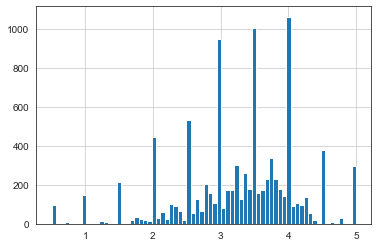

In [31]:
ratings['rating'].hist(bins=70)

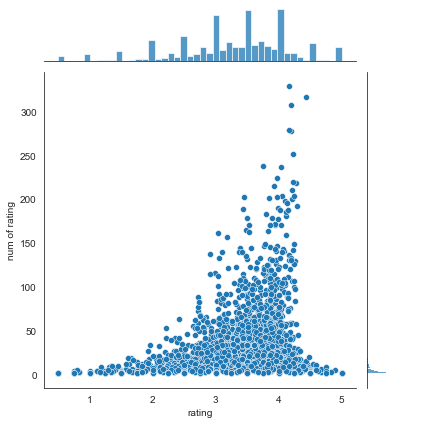

In [32]:
sns.jointplot(x='rating',y='num of rating',data=ratings)

In [33]:
df.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [34]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ratings.sort_values('num of rating', ascending=False).head()

,rating,num of rating
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [36]:
similar_fg_rating = moviemat.corrwith(moviemat['Forrest Gump (1994)'])
similar_fg_rating

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.011189
xXx (2002)                                   0.306817
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                        0.449692
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [37]:
similar_m_rating = moviemat.corrwith(moviemat['Matrix, The (1999)'])
similar_m_rating

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.049146
xXx (2002)                                   0.495251
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                       -0.006953
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [41]:
corr_fg = pd.DataFrame(similar_fg_rating,columns=['Correlation'])
corr_fg.dropna(inplace=True)
# corr_fg.sort_values(' ',ascending=False)
corr_fg.head(10)

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.752057
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.088009
"10,000 BC (2008)",-0.143823


In [ ]:
corr_fg = corr_fg.join(ratings['num of rating'])
corr_fg.head(10)

,Correlation,num of rating
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),0.752057,14
10 Items or Less (2006),-1.000000,3
10 Things I Hate About You (1999),0.088009,54
"10,000 BC (2008)",-0.143823,17


In [42]:
corr_fg[corr_fg['num of rating'] > 50].sort_values('Correlation', ascending=False).head(10)

KeyError: 'num of rating'

In [43]:
corr_m = pd.DataFrame(similar_m_rating,columns=['Correlation'])
corr_m.dropna(inplace=True)
corr_m.sort_values('Correlation',ascending=False)
corr_m.head(10)

,Correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.637813
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.166496
"10,000 BC (2008)",0.205960


In [44]:
corr_m = corr_m.join(ratings['num of rating'])
corr_m.head()

,Correlation,num of rating
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2


In [45]:
corr_m[corr_m['num of rating'] > 50].sort_values('Correlation', ascending=False).head(10)

,Correlation,num of rating
title,,
"Matrix, The (1999)",1.000000,278
Slumdog Millionaire (2008),0.613839,71
Kung Fu Panda (2008),0.612549,54
Interstellar (2014),0.599040,73
Legends of the Fall (1994),0.567155,68
"Dark Knight Rises, The (2012)",0.557125,76
Die Hard (1988),0.544466,145
"Grand Budapest Hotel, The (2014)",0.543633,52
"Matrix Reloaded, The (2003)",0.522551,96
